In [9]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import models
from keras.models import Sequential, Model
from keras.layers import  Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from keras import regularizers

In [10]:
#reading the dataset using pandas
df = pd.read_csv('data.csv')

In [11]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [12]:
#dividing dataframe into inputs and output
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

#splitting dataframe into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.15, shuffle = True, random_state = 8)


In [13]:
X_train.shape

(78200, 1024)

In [14]:
X_test.shape

(13800, 1024)

In [15]:
#defining output y
label = y_train.values
y_train = np.zeros([X_train.shape[0],df['character'].unique().shape[0]])
label.shape

(78200,)

In [17]:
label[4]

'character_21_pa'

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
#binarizing the output y converting to 1-hot vector
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y_train = binencoder.fit_transform(label)
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
#reshaping X_train
X_train = X_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], 32, 32, 1))

In [21]:
X_train.shape

(78200, 32, 32, 1)

In [22]:
#defining plot function
def plot(number):
    for i in range(number):
        plt.imshow(X_train[i], cmap='gray')
        plt.title(label[i])
        plt.show()

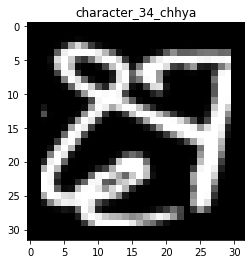

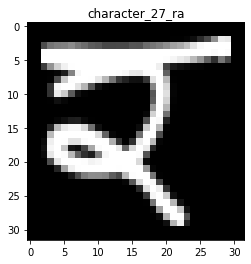

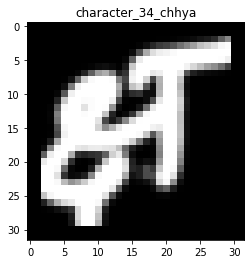

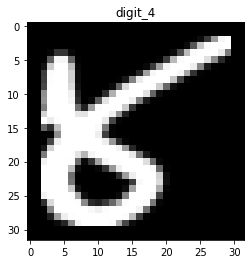

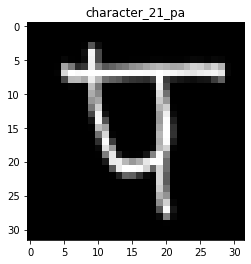

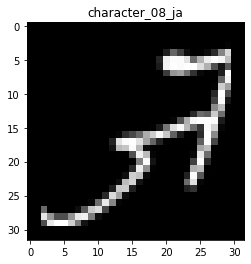

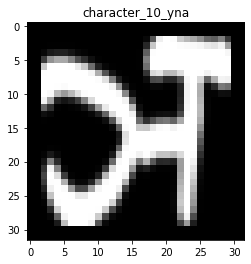

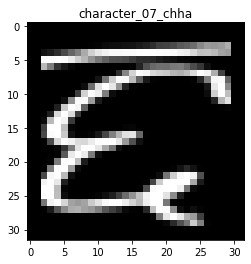

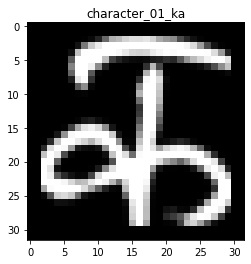

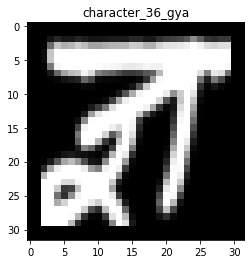

In [23]:
plot(10)

In [68]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), strides=1,  input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(16, kernel_size=(5, 5), strides=1))
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(16, kernel_size=(5, 5), strides=1))
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(46))
model.add(Activation('softmax'))


In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        6416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 16)          6416      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 16)        

In [70]:
#adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.75)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [71]:
#training the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 200)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 5.3470 - accuracy: 0.0901
Epoch 2/10
391/391 [==============================] - 14s 37ms/step - loss: 2.5994 - accuracy: 0.2804
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 1.8481 - accuracy: 0.4531
Epoch 4/10
391/391 [==============================] - 15s 37ms/step - loss: 1.4281 - accuracy: 0.5692
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 1.1356 - accuracy: 0.6555
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 0.9601 - accuracy: 0.7119
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.8209 - accuracy: 0.7530
Epoch 8/10
391/391 [==============================] - 15s 38ms/step - loss: 0.7518 - accuracy: 0.7715
Epoch 9/10
391/391 [==============================] - 16s 40ms/step - loss: 0.6739 - accuracy: 0.7959
Epoch 10/10
391/391 [==============================] - 16s 41ms/step - loss: 0.623

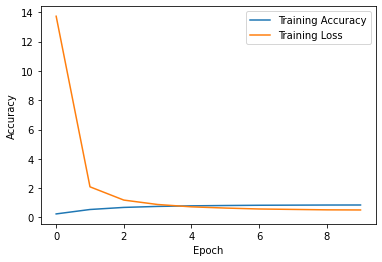

(13800, 32, 32, 1)

In [61]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
X_test.shape

In [62]:
X_test = X_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [63]:
X_test = np.reshape(X_test, (X_test.shape[0], 32, 32, 1))
X_test.shape

(13800, 32, 32, 1)

In [64]:
label_test = y_test.values
y_test = np.zeros([X_test.shape[0],df['character'].unique().shape[0]])
binencoder = LabelBinarizer()
y_test = binencoder.fit_transform(label_test)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [65]:
y_test.shape

(13800, 46)

In [66]:
model.evaluate(X_test, y_test)

432/432 [==============================] - 2s 3ms/step - loss: 0.2735 - accuracy: 0.9164


[0.2735317647457123, 0.916449248790741]

In [67]:
model.save('CNN.h5')